In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab

np.set_printoptions(suppress=True)

from scipy.optimize import curve_fit

In [2]:
df_plurality = pd.read_csv('parallel_merge_plurality.csv', names=['k','node','number_influenced','s'])
df_max = pd.read_csv('parallel_merge_max.csv', names=['k','node','number_influenced','s'])
df_min = pd.read_csv('parallel_merge_min.csv', names=['k','node','number_influenced','s'])
df_random = pd.read_csv('parallel_merge_random.csv', names=['k','node','number_influenced','s'])

In [3]:
def transform_data_plot(df):
    df_t = df.copy()

    # Get only rows with the max k-value
    idx = df_t.groupby(['node','s'])['k'].transform(max) == df_t['k']
    df_t = df_t[idx][['node','number_influenced','s']]
    df_t = df_t.reset_index(drop=True)
    
    # Group by s and calculate the mean
    df_t = df_t[['s','number_influenced']].groupby(by='s', as_index=False).mean()
        
    return df_t

## Simple majority

In [4]:
df_plot = transform_data_plot(df_plurality).round(3)
df_plot.head()

,s,number_influenced
0,0,1.162
1,1,10.145
2,2,52.425
3,3,238.336
4,4,828.658


In [5]:
def bass_wo(x, M, P, Q):
    """
    p: coefficinet of innvotion
    q: coefficient of imitation
    m: potential pool of adapoters
    
    The average value of p has been found to be 0.03, and is often less than 0.01
    The average value of q has been found to be 0.38, with a typical range between 0.3 and 0.5
    """
    y = M * (((P+Q)**2/P)*np.exp(-(P+Q)*(x)))/(1+(Q/P)*np.exp(-(P+Q)*(x)))**2 
    return y

In [6]:
xdata = df_plot['s'].values
ydata = df_plot['number_influenced'].values

In [7]:
inverse_cum = df_plot['number_influenced'].values.copy()
inverse_cum[1:] -= inverse_cum[:-1].copy()
inverse_cum

array([   1.162,    8.983,   42.28 ,  185.911,  590.322, 1083.902,
       1078.614,  673.3  ,  307.598,  122.284,   44.45 ,   13.688,
          3.51 ,    0.853,    0.23 ,    0.337,    0.507,    0.069])

In [8]:
popt, pcov = curve_fit(bass_wo, xdata, inverse_cum)

m = popt[0].round(3)
p = popt[1].round(3)
q = popt[2].round(3)

print(popt)

[4189.77685547    0.00215392    1.11478139]


/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in square
  # Remove the CWD from sys.path while we load stuff.


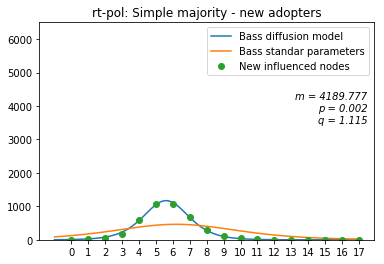

In [9]:
x = np.linspace(-1, 17, 100)
y = bass_wo(x, *popt)
y_standar = bass_wo(x, m, 0.03, 0.38)

plt.title('rt-pol: Simple majority - new adopters')
var_text = 'm = {}\np = {}\nq = {}'.format(m,p,q)
plt.text(17.5, 3500, var_text, horizontalalignment='right', style='italic')

pylab.plot(x, y, label='Bass diffusion model')
pylab.plot(x, y_standar, label='Bass standar parameters')
pylab.plot(xdata, inverse_cum, 'o', label='New influenced nodes')

pylab.ylim(0,6500)
pylab.xticks(range(0, 18))
pylab.legend(loc='best')
pylab.show()

## Max

In [10]:
df_plot = transform_data_plot(df_max).round(3)
df_plot.head()

,s,number_influenced
0,0,1.162
1,1,9.398
2,2,48.453
3,3,216.296
4,4,743.715


In [11]:
xdata = df_plot['s'].values
ydata = df_plot['number_influenced'].values

In [12]:
inverse_cum = df_plot['number_influenced'].values.copy()
inverse_cum[1:] -= inverse_cum[:-1].copy()
inverse_cum

array([   1.162,    8.236,   39.055,  167.843,  527.419, 1021.043,
       1114.264,  737.615,  340.746,  132.414,   47.666,   14.718,
          3.749,    0.921,    0.226,    0.347,    0.507,    0.069])

In [13]:
popt, pcov = curve_fit(bass_wo, xdata, inverse_cum)

m = popt[0].round(3)
p = popt[1].round(3)
q = popt[2].round(3)

print(popt)

[4197.59835513    0.00192689    1.10684301]


/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in multiply
  # Remove the CWD from sys.path while we load stuff.
/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in square
  # Remove the CWD from sys.path while we load stuff.


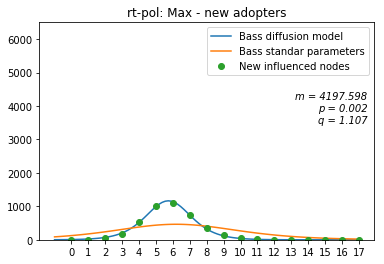

In [14]:
x = np.linspace(-1, 17, 100)
y = bass_wo(x, *popt)
y_standar = bass_wo(x, m, 0.03, 0.38)

plt.title('rt-pol: Max - new adopters')
var_text = 'm = {}\np = {}\nq = {}'.format(m,p,q)
plt.text(17.5, 3500, var_text, horizontalalignment='right', style='italic')

pylab.plot(x, y, label='Bass diffusion model')
pylab.plot(x, y_standar, label='Bass standar parameters')
pylab.plot(xdata, inverse_cum, 'o', label='New influenced nodes')

pylab.ylim(0,6500)
pylab.xticks(range(0, 18))
pylab.legend(loc='best')
pylab.show()

## Min

In [15]:
df_plot = transform_data_plot(df_min).round(3)
df_plot.head()

,s,number_influenced
0,0,4158
1,1,4158
2,2,4158
3,3,4158
4,4,4158


In [16]:
xdata = df_plot['s'].values
ydata = df_plot['number_influenced'].values

In [17]:
inverse_cum = df_plot['number_influenced'].values.copy()
inverse_cum[1:] -= inverse_cum[:-1].copy()
inverse_cum

array([4158,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0])

In [18]:
popt, pcov = curve_fit(bass_wo, xdata, inverse_cum)

m = popt[0].round(3)
p = popt[1].round(3)
q = popt[2].round(3)

print(popt)

RuntimeError: Optimal parameters not found: gtol=0.000000 is too small, func(x) is orthogonal to the columns of
  the Jacobian to machine precision.

In [ ]:
x = np.linspace(-1, 17, 100)
y = bass_wo(x, *popt)
y_standar = bass_wo(x, m, 0.03, 0.38)

plt.title('rt-pol: Min - new adopters')
var_text = 'm = {}\np = {}\nq = {}'.format(m,p,q)
plt.text(17.5, 3500, var_text, horizontalalignment='right', style='italic')

pylab.plot(x, y, label='Bass diffusion model')
pylab.plot(x, y_standar, label='Bass standar parameters')
pylab.plot(xdata, inverse_cum, 'o', label='New influenced nodes')

pylab.ylim(0,6500)
pylab.xticks(range(0, 18))
pylab.legend(loc='best')
pylab.show()

## Random

In [19]:
df_plot = transform_data_plot(df_random).round(3)
df_plot.head()

,s,number_influenced
0,0,2776.216
1,1,3317.061
2,2,3466.658
3,3,3517.285
4,4,3559.566


In [20]:
xdata = df_plot['s'].values
ydata = df_plot['number_influenced'].values

In [21]:
inverse_cum = df_plot['number_influenced'].values.copy()
inverse_cum[1:] -= inverse_cum[:-1].copy()
inverse_cum

array([2776.216,  540.845,  149.597,   50.627,   42.281,   96.909,
        166.101,  160.882,   99.061,   45.955,   19.191,    6.966,
          2.02 ,    0.497,    0.127,    0.225,    0.328,    0.172])

In [22]:
popt, pcov = curve_fit(bass_wo, xdata, inverse_cum)

m = popt[0].round(3)
p = popt[1].round(3)
q = popt[2].round(3)

print(popt)

[  53.52516565   51.86749011 4859.91652063]


/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in square
  # Remove the CWD from sys.path while we load stuff.
/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in square
  # Remove the CWD from sys.path while we load stuff.
/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


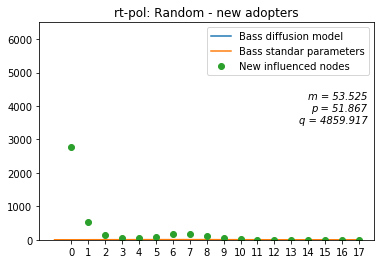

In [23]:
x = np.linspace(-1, 17, 100)
y = bass_wo(x, *popt)
y_standar = bass_wo(x, m, 0.03, 0.38)

plt.title('rt-pol: Random - new adopters')
var_text = 'm = {}\np = {}\nq = {}'.format(m,p,q)
plt.text(17.5, 3500, var_text, horizontalalignment='right', style='italic')

pylab.plot(x, y, label='Bass diffusion model')
pylab.plot(x, y_standar, label='Bass standar parameters')
pylab.plot(xdata, inverse_cum, 'o', label='New influenced nodes')

pylab.ylim(0,6500)
pylab.xticks(range(0, 18))
pylab.legend(loc='best')
pylab.show()